In [1]:
#Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
#Khởi tạo dữ liệu
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,42.909410,5.190464,7.464627,1.963827,19.044651
1,59.488687,4.491318,10.913761,20.933992,13.570943
2,55.614461,6.582274,8.471242,1.429883,19.856943
3,26.111980,14.266193,10.695629,17.805094,22.651693
4,53.174762,14.849279,6.657435,14.456106,19.192618


<AxesSubplot:ylabel='Density'>

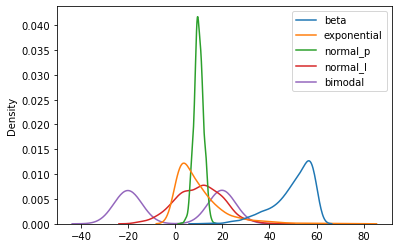

In [5]:
# trực quan hóa dữ liệu
sns.kdeplot(data=df)

In [6]:
#Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.117039,10.293928,9.963322,10.192247,-0.096651
std,8.521011,10.673333,1.979757,9.790495,20.195290
min,12.274040,0.002655,2.731797,-16.521198,-28.516239
25%,45.842045,2.988837,8.711928,3.165464,-20.114796
50%,52.466335,7.265756,9.892313,10.567903,0.729801
75%,56.689015,13.908191,11.284345,17.109050,19.953461
max,59.994059,77.389197,16.641329,43.258115,29.762613


<AxesSubplot:ylabel='Density'>

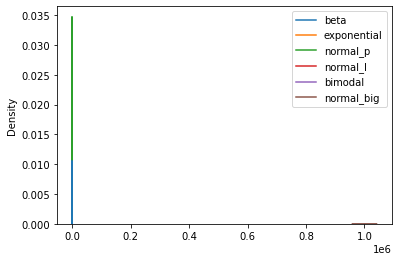

In [7]:
#Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

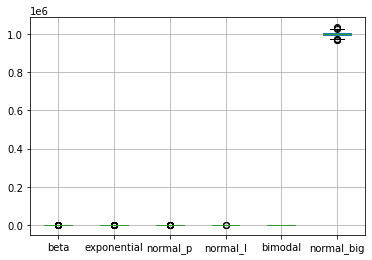

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
#Chuẩn hóa với StandardScaler (Z-Score scaling)
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sách cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.027042,-0.288574,1.135929,0.673381,0.808257,1.352827
1,1.112982,-0.847557,0.641477,-1.233889,1.123923,-0.999809
2,0.916789,-0.053407,-3.126039,-0.536581,1.234114,-1.391919
3,1.003637,0.181953,-0.238370,-0.003464,1.307355,-0.341633
4,0.964357,0.018118,0.304894,0.503692,0.992029,0.571576


<AxesSubplot:ylabel='Density'>

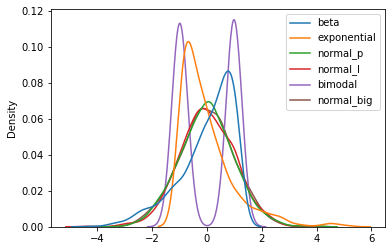

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.128742e-16,-1.605382e-16,8.792966e-17,1.029073e-16,-1.008083e-16,5.045908e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.178146e+00,-1.009895e+00,-3.126039e+00,-4.393900e+00,-1.407678e+00,-2.973530e+00
25%,-5.064515e-01,-7.148731e-01,-6.391661e-01,-6.578121e-01,-9.890680e-01,-6.333881e-01
50%,2.589372e-01,-2.860594e-01,1.005752e-02,-2.039952e-02,4.216670e-02,-3.183016e-03
75%,7.806226e-01,3.717233e-01,6.329336e-01,6.878365e-01,9.844407e-01,6.381149e-01
max,1.190685e+00,5.198751e+00,3.994472e+00,3.155915e+00,1.385447e+00,3.844291e+00


<AxesSubplot:>

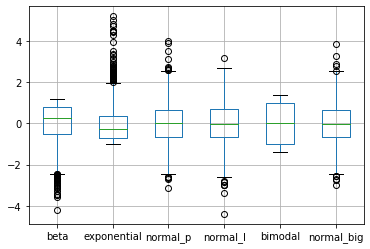

In [14]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [ ]:
#Chúng ta có thể thấy rằng các phân phối đã được điều chỉnh và giá trị trung bình là một số rất nhỏ gần bằng 0 và độ lệch chuẩn rất gần bằng 1 cho mỗi biến.

In [23]:
#Chuẩn hóa với Min-Max scaling
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [25]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sách cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [26]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.848502,0.222806,0.289619,0.264973,0.824922,0.499978
1,0.939502,0.144671,0.545912,0.514229,0.745627,0.287771
2,0.820953,0.109808,0.374060,0.339876,0.857609,0.433360
3,0.370475,0.067210,0.305589,0.471878,0.818666,0.516110
4,0.692377,0.106717,0.610977,0.575398,0.853768,0.392729


<AxesSubplot:ylabel='Density'>

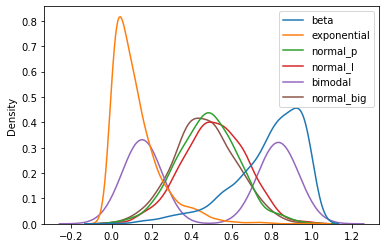

In [27]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

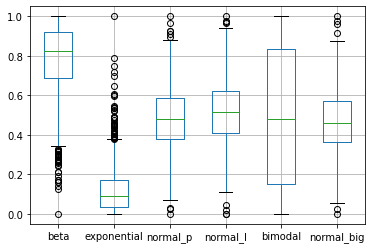

In [28]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [29]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.784534,0.125417,0.482516,0.512548,0.492628,0.468082
std,0.177403,0.123590,0.153620,0.158043,0.345294,0.156031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.688235,0.037404,0.379512,0.407323,0.153743,0.364433
50%,0.826810,0.090908,0.482861,0.513672,0.479398,0.462784
75%,0.921934,0.173767,0.584679,0.622096,0.834802,0.570752
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [31]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [32]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[13.64181591523214,
 0.013024915819759451,
 3.8077615062662753,
 -22.59323532649762,
 -28.77308103511373,
 970415.5770821109]

In [33]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [34]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.999042318864,
 76.95979233406463,
 16.61922671647477,
 41.22742519780239,
 29.66809232526805,
 1034388.163744131]

In [35]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0]

In [ ]:
#Chúng ta có thể thấy rằng, dữ liệu đã được đưa về khoảng 0-1 so với các khoảng rất khác nhau như ban đầu

In [9]:
# Khai báo đối tượng RobustScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.881069,-0.190056,-0.943737,-0.617063,0.457091,-0.589114
1,0.647402,-0.254084,0.397078,0.743431,0.320482,0.478030
2,0.290231,-0.062594,-0.552426,-0.655357,0.477364,-0.494240
3,-2.429651,0.641104,0.312281,0.519034,0.547114,0.033861
4,0.065311,0.694503,-1.257525,0.278852,0.460784,0.444053


<AxesSubplot:ylabel='Density'>

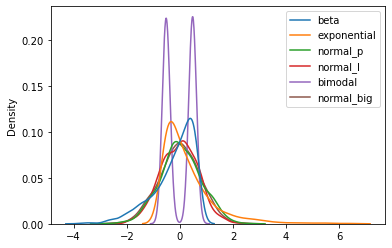

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,-2.165854e-01,0.277321,2.760430e-02,-2.694114e-02,-0.020626,-0.016145
std,7.855660e-01,0.977469,7.696096e-01,7.021504e-01,0.504022,0.755616
min,-3.705394e+00,-0.665158,-2.783575e+00,-1.942764e+00,-0.729905,-2.583071
25%,-6.107042e-01,-0.391682,-4.588622e-01,-5.308849e-01,-0.520227,-0.499199
50%,3.275375e-16,0.000000,-3.452100e-16,-6.369688e-17,0.000000,0.000000
75%,3.892958e-01,0.608318,5.411378e-01,4.691151e-01,0.479773,0.500801
max,6.939933e-01,6.421940,2.623609e+00,2.344462e+00,0.724584,2.562023


<AxesSubplot:>

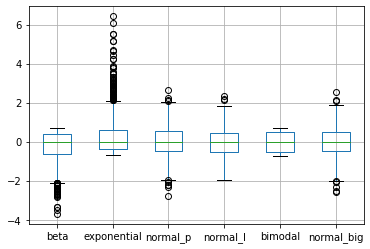

In [14]:
#trực quan vs box-plot
df_s.boxplot()

In [15]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.7053937303983475,
 -0.6651584553502291,
 -2.7835751715654777,
 -1.942764365905358,
 -0.729905474155803,
 -2.5830714802873977]

In [16]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6939932660691833,
 6.421940192012967,
 2.6236091067666134,
 2.3444623456412184,
 0.7245838573041073,
 2.5620226888131876]

In [17]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.24663351e+01, 7.26575603e+00, 9.89231251e+00, 1.05679033e+01,
       7.29801344e-01, 1.00039216e+06])

In [ ]:
#Mặc dù phạm vi giá trị cho mỗi đặc trưng nhỏ hơn nhiều so với các đặc trưng gốc, nhưng nó lớn hơn và thay đổi nhiều hơn so với MinMaxScaler. Các giá trị phân phối bimodal hiện được nén thành hai nhóm nhỏ.